# pass@k analysis
This notebook demonstrates how to visualize which model managed to achieve which pass@k value.

In [6]:
import pandas as pd
import os

In [7]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + filename)
        df['model'] = filename.replace("_passk_results.csv", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_gpt-4-turbo-2024-04-09_passk_results.csv
samples_claude-3-opus-20240229_passk_results.csv
samples_gpt-3.5-turbo-1106_passk_results.csv
samples_gpt-4-1106-preview_passk_results.csv
samples_gemini-pro_passk_results.csv
samples_reference_passk_results.csv
samples_codellama_passk_results.csv


In [8]:
df

,Unnamed: 0,pass@1,pass@5,pass@10,model
0,0,0.473684,0.686090,0.736842,gpt-4-turbo-2024-04-09
0,0,0.470175,0.654135,0.684211,claude-3-opus-20240229
0,0,0.333333,0.553676,0.701754,gpt-3.5-turbo-1106
0,0,0.464912,0.678850,0.719298,gpt-4-1106-preview
0,0,0.173684,0.353523,0.438596,gemini-pro
0,0,1.000000,1.000000,1.000000,reference
0,0,0.087719,0.300543,0.456140,codellama


In [9]:
# Drop the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values("pass@1", ascending=False)
df

,pass@1,pass@5,pass@10,model
0,1.000000,1.000000,1.000000,reference
0,0.473684,0.686090,0.736842,gpt-4-turbo-2024-04-09
0,0.470175,0.654135,0.684211,claude-3-opus-20240229
0,0.464912,0.678850,0.719298,gpt-4-1106-preview
0,0.333333,0.553676,0.701754,gpt-3.5-turbo-1106
0,0.173684,0.353523,0.438596,gemini-pro
0,0.087719,0.300543,0.456140,codellama


In [10]:
# Set the "model" column as the index and then transpose
df_transposed = df.set_index('model').transpose()
df_transposed['k'] = [1,5,10]
df_transposed

model,reference,gpt-4-turbo-2024-04-09,claude-3-opus-20240229,gpt-4-1106-preview,gpt-3.5-turbo-1106,gemini-pro,codellama,k
pass@1,1.0,0.473684,0.470175,0.464912,0.333333,0.173684,0.087719,1
pass@5,1.0,0.686090,0.654135,0.678850,0.553676,0.353523,0.300543,5
pass@10,1.0,0.736842,0.684211,0.719298,0.701754,0.438596,0.456140,10


     pass@1    pass@5   pass@10                   model
0  1.000000  1.000000  1.000000               reference
0  0.473684  0.686090  0.736842  gpt-4-turbo-2024-04-09
0  0.470175  0.654135  0.684211  claude-3-opus-20240229
0  0.464912  0.678850  0.719298      gpt-4-1106-preview
0  0.333333  0.553676  0.701754      gpt-3.5-turbo-1106
0  0.173684  0.353523  0.438596              gemini-pro
0  0.087719  0.300543  0.456140               codellama


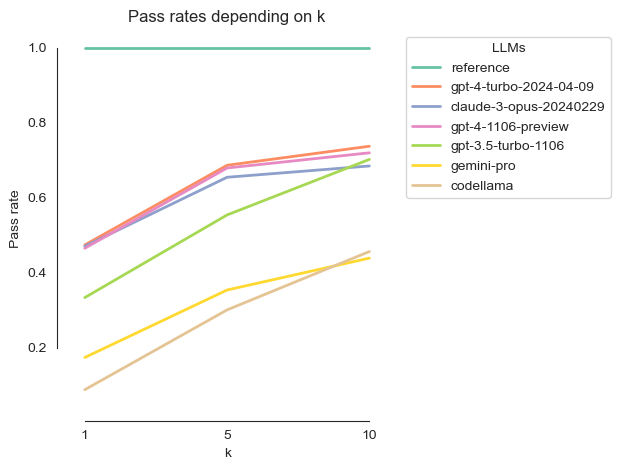

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


# Assuming 'k' is an index after transposition, let's reset the index first if not already done
if 'k' not in df_transposed.columns:
    df_transposed.reset_index(inplace=True)
print(df)
# Separate 'k' column for x-axis
x = df_transposed['k']
vals = df_transposed.drop('k', axis=1)
g = sns.lineplot(vals, palette="Set2", dashes=False, linewidth=2)
sns.despine(offset=10, trim=True);
g.set_xticklabels(x)

# Adding plot decorations
plt.xlabel('k')
plt.ylabel('Pass rate')
plt.title('Pass rates depending on k')
plt.legend(title='LLMs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("../docs/paper/pass_k_llms_plot.png")
plt.show()

In [53]:
df_transposed.drop('k', axis=1)

model,reference,gpt-4-turbo-2024-04-09,claude-3-opus-20240229,gpt-4-1106-preview,gpt-3.5-turbo-1106,gemini-pro,codellama
pass@1,1.0,0.473684,0.470175,0.464912,0.333333,0.173684,0.087719
pass@5,1.0,0.686090,0.654135,0.678850,0.553676,0.353523,0.300543
pass@10,1.0,0.736842,0.684211,0.719298,0.701754,0.438596,0.456140
